<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%A3o_de_Cr%C3%A9dito_e_D%C3%A9bito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecção de Fraudes em Cartões de Crédito e Débito**
---

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)



![img](https://image.freepik.com/fotos-gratis/maquina-de-furto-de-cartao-de-credito-e-um-jovem-segurando-um-cartao-de-credito-para-pagar-compras_24901-1786.jpg)

Um dos grande problemas de uma instituição financeira (bancos ou *fintechs*) é, sem dúvidas, a grande quantidade de fraudes cometidas em cartões de crédito e débito. No Brasil, como afirma a página do [R7](https://noticias.r7.com/economia/fraudes-com-cartao-disparam-na-pandemia-veja-como-se-prevenir-19062020) este crime aumentou durante a pandemia do novo coronavírus, sendo a clonagem de cartão a tipificação mais comum, atingido cerca de 9 milhões de brasileiros em 12 meses. 

Isso não tem a ver apenas com a relação entre a população e as transações bancárias, mas também muito se deve com o uso em meios digitais, seja por aplicativos como por compras online. Segundo o site [Valor Investe](https://valorinveste.globo.com/produtos/servicos-financeiros/noticia/2020/02/12/brasil-e-2o-pais-da-america-latina-com-mais-fraudes-no-cartao-em-compras-online.ghtml) o Brasil é segundo país da América Latina com mais fraudes em cartão quando o quesito é compra online, atrás apenas do México.

Com esse panorama é de se imaginar que as instituições, a fim de trazer uma segurança para seus clientes invistam em proteção para evitar que isso ocorra.

**Como isso acontece?**

Uma das maneiras mais usuais é a de, após analisar o perfil de compra de um cliente, não permitir que compras que fujam do perfil ocorram.

A exemplo, alguém que tem costume de comprar nos locais A e B e mensalmente seu histórico de compras orbita entre R\$ 1.500,00 (mil e quinhentos reais) e R\$ 2.000,00 (dois mil reais). Se faz uma compra no valor de R\$ 3.000,00 (três mil reais) em uma única compra e em um lugar diferente de A e B, por exemplo, poderá ter a compra bloqueada por não corresponder ao seu perfil de compra.

O exemplo dado é simplista, mas nos motra o panorama e nos dá um *insight* importante: As instituições financeiras  devem preferir errar mais ao encontrar falsos positivos, ou seja, pessoas que realmente eram as donas do cartão, mas que foram bloqueadas em suas compras do que permitir passar falsos negativos, ou seja, pessoas que não era os donos do cartões e compraram, em um sistema de compensação nas métricas utilizadas.


## **Sobre os Dados**

Os dados utilizados foram disponibilizados por algumas empresas européias de cartão de crédito. As operações presentes foram recolhidas em um intervalo de apenas dois dias, contendo **284.315 (duzentos e oitenta e quatro mil trezentos e quinze) transações não fraudulentas** e **492 (quatrocentos e noventa e duas) fraudulentas**, ou seja apenas 0,17% fraudulentas se comparadas às não fraudulentas.

Graças à privacidade e segurança, os dados foram modificados. Sendo assim, não sabemos a qual variável estamos realmente referenciando ao falar de qualquer uma das *features*, além de todas estarem em formato numérico. Nada disso é um problema, uma vez que nosso intuito é criar uma classificador e não fazer uma análise e, utilizaremos modelo de Machine Learning, que muitas vezes só funcionam com variáveis numéricas, ou muitas vezes funcionam tão bem quanto.

Ná pagina [fonte](https://www.kaggle.com/mlg-ulb/creditcardfraud) dos dados, nos é falado que as variáveis passaram pelo processo de PCA (*Principal Component Analysis* ou Análise de Componente Principais), que reduz a dimensionalidade dos dados, mantendo tanto quanto possível as informaçoes dos dados.

As variáveis `Amount` (valor) e `Class` (classe) foram preservadas em seus valores originais. Na variável `Class` temos 0  como transações normais e 1 como transações fraudulentas.



**Importantos as bibliotecas necessárias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot -q
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

sns.set_style('dark')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**Importando os dados**

In [ ]:
PATH = 'https://www.dropbox.com/s/0ywmictszba7tqr/creditcard.csv?dl=1'
df = pd.read_csv(PATH)

## **Análise Exploratória**


**Visualizando os primeiros dados**

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Visualizando informações estatísticas**

> As variáveis relativas aos componentes principais (transformação PCA) e a coluna `Time` não têm nenhuma discrepância aparente.

> A variável `Amount` tem o valor médio de transações (considerando ambas as classes) de 88.34, mediana igual a 22.00 e desvio padrão de 250.12. Atingindo o valor máximo de 25.691.16 (vinte e cinco mil seiscentos e noventa e um e dezesseis), a maioria das transações financeiras é composta em sua maioria por quantias menores, ou seja, transações de baixos valores, como esperado.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Checando valores nulos**

In [ ]:
df.isnull().sum().max()

0

**Tamanho do dataset**
> Veja a discrepância de valores para `0` = Transações normais  e `1` = Transaçõs fraudulentas.

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

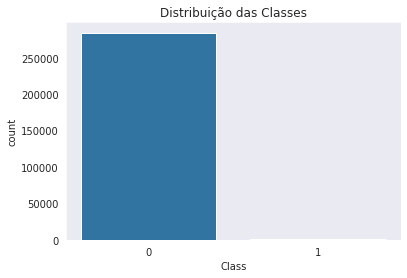

In [ ]:
print(df.Class.value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot()

**Visualizando distribuições das classes**
> Não há informações importantes para o presente problema que possa ser visualizado aqui.

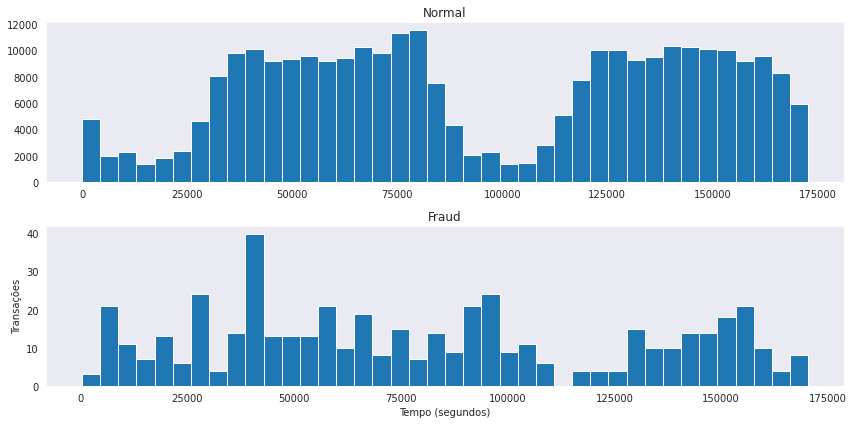

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraud')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

**Visualizando via Boxplot**
> Aqui conseguimos ver que as transações normais seguem com um número absurdo de *outliers*, enquanto as fraudes não contêm muitos.

> É importante lembrar que a diferença é enorm entre as classes, logo, é comum se ter muito mais outliers nas transações normais.

> Foram colocados os limites de -20 e 400 a fim de se conseguir uma visualização.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


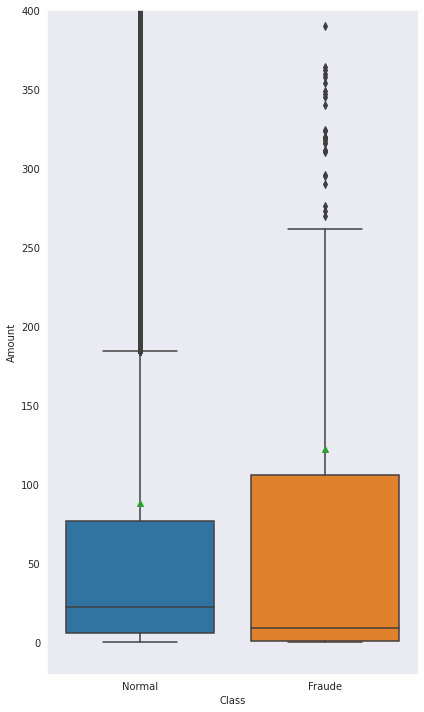

In [ ]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

**Visualizando informações estatísticas para transações fraudulentas**

> Veja que, agora podemos ver que a média é de 118.13 e a mediana é de 9.21, o que nos indica *outliers* puxando a média para cima.

In [ ]:
df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

**Gráfico de densidade**
> Infelizmente não podemos saber quais são as variáveis reais utilizadas. Nesse tipo de gráfico, procuramos normalmente distribuições que diferem de um para a outra como é o caso de `V3`, `V4`, `V10` e `V11`. Ao passo que `V8`, `V13` e `V15` são muito similares.

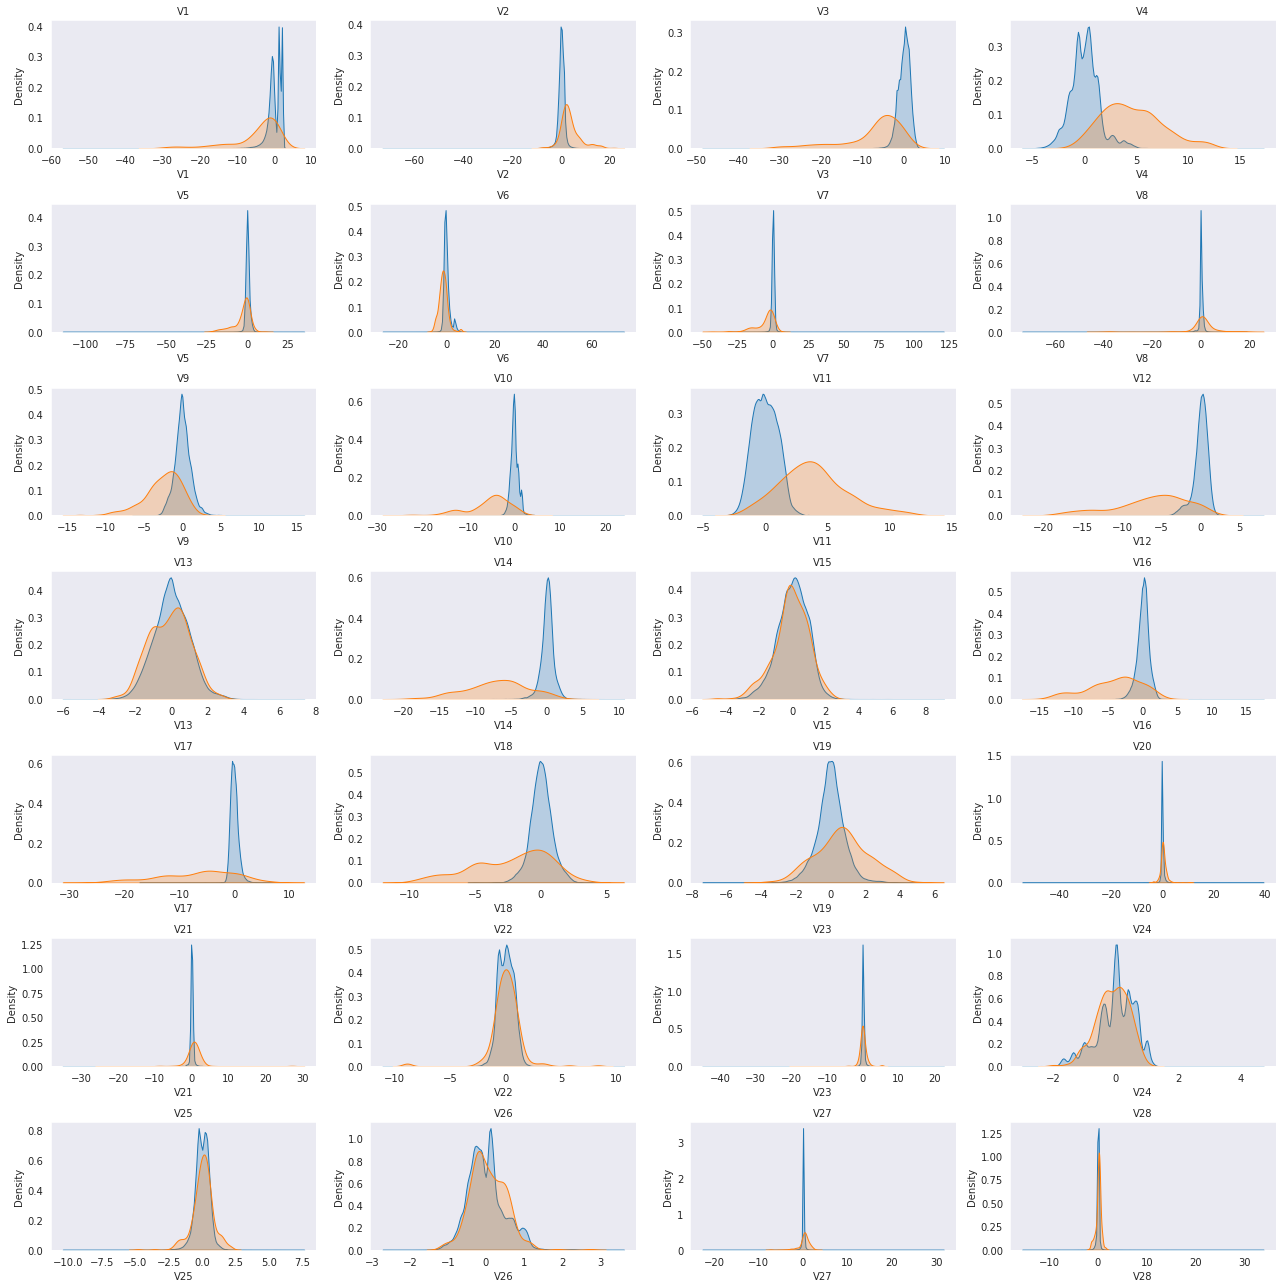

In [ ]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()


## **Preparação dos Dados**


**Padronizando `Time` e `Amount`**
> Uma vez que os valores entre as variáveis estão em ordem de grandeza diferente, padronizar as *features* `Time` e `Amount` se faz necessário para prosseguirmos.

In [ ]:
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

**Visualizando as primeiras entradas**

In [ ]:
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**Divisão dos dados**
> `stratify=y` nos garante uma divisão que seja coerente em relação ao número representado na classe.

In [ ]:
# separando variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividindo o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

**Balanceando os dados**

> Vamos utilizar a técnica de `Under-sampling` neste caso. O objetivo da técnica é manter a classe menor intacta e retirar da classe majoritária dados até ficar do tamanho da minoritária. É importante afirmar que não é feita aleatoriamente. Dentro do processo, busca-se automaticamente ser representativo.

> Para visualizar mais sobre esse tipo de operação, clique [aqui](https://github.com/amadords/Projetos-Publicos/blob/master/Classes_Desbalanceadas.ipynb).

1    369
0    369
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


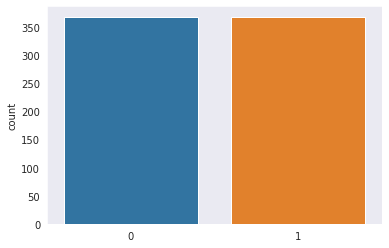

In [ ]:
# aplicando a técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# visualizando o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotando a nova distribuição de classes
sns.countplot(y_rus);

**Matriz de correlação**
> Fica evidente o quanto os dados enquanto desbalanceados atrapalham em nossas análises. 
A matriz de correlação é um ótimo exemplo disso. Veja que nos dados desbalanceados não conseguimos ver relações entre os dados, ao passo que os dados quando balanceados nos retornam algumas variáveis que se correlacionam, a exemplo de `V1` e `V3` que têm uma boa correlação.

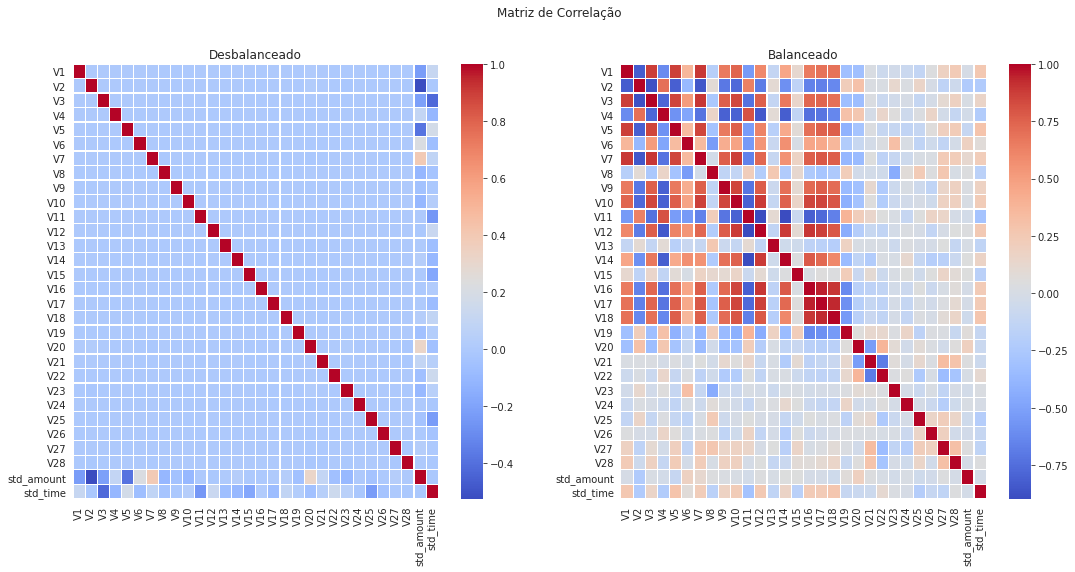

In [ ]:
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

## **Modelos de Machine Learning**

> Utilizaremos quatro modelos clássicos nesta etapa.

- `Regresão Logística` - Saiba mais [aqui](https://bit.ly/3kwpVgQ).
- `Árvore de Decisão` - Saiba mais [aqui](https://bit.ly/2Guqmcd).
- `Floresta Aleatória` - Saiba mais [aqui](https://bit.ly/2Sg9LM7).
- `KNN` - Saiba mais [aqui](https://bit.ly/34vtr4v).

### Regressão Logística

In [ ]:
# importando a biblioteca
from sklearn.linear_model import LogisticRegression

# instanciando e treinando um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazendo as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

### Avaliação do modelo

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9576    0.9782     71079
           1     0.0343    0.8699    0.0659       123

    accuracy                         0.9574     71202
   macro avg     0.5170    0.9138    0.5221     71202
weighted avg     0.9981    0.9574    0.9766     71202

Acurácia: 0.9574

AUC: 0.9138



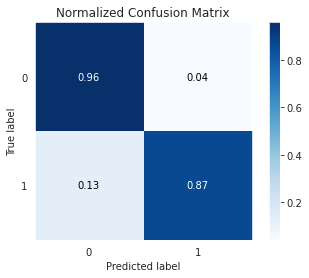

In [ ]:
# plotando a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimindo relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimindo a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

### Árvore de Decisão

In [ ]:
# importando a biblioteca
from sklearn.tree import DecisionTreeClassifier

# instanciando e treinando um modelo de Árvore de Decisão
model_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy")
model_tree.fit(X_rus, y_rus)

# fazendo as previsões em cima dos dados de teste
y_pred = model_tree.predict(X_test)

### Avaliação do Modelo

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9275    0.9623     71079
           1     0.0205    0.8780    0.0401       123

    accuracy                         0.9274     71202
   macro avg     0.5102    0.9028    0.5012     71202
weighted avg     0.9981    0.9274    0.9607     71202

Acurácia: 0.9274

AUC: 0.9028



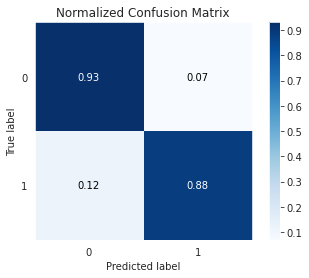

In [ ]:
# plotando a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimindo relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimindo a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

### Floresta Aleatória

In [ ]:
# importando a biblioteca
from sklearn.ensemble import RandomForestClassifier

# instanciando e treinando um modelo de Floresta Aleatória
model_forest = RandomForestClassifier(n_estimators=20)
model_forest.fit(X_rus, y_rus)

# fazendo as previsões em cima dos dados de teste
y_pred = model_forest.predict(X_test)

### Avaliação do Modelo

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.9617    0.9803     71079
           1     0.0371    0.8537    0.0712       123

    accuracy                         0.9615     71202
   macro avg     0.5184    0.9077    0.5258     71202
weighted avg     0.9981    0.9615    0.9788     71202

Acurácia: 0.9615

AUC: 0.9077



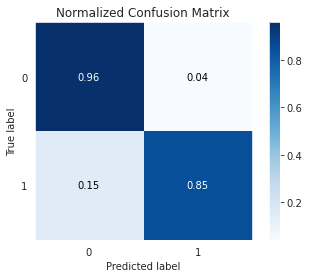

In [ ]:
# plotando a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimindo relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimindo a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

### KNN

In [ ]:
# importando a biblioteca
from sklearn.neighbors import KNeighborsClassifier

# instanciando e treinando um modelo de KNN
model_knn = knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_rus, y_rus)

# fazendo as previsões em cima dos dados de teste
y_pred = model_knn.predict(X_test)

### Avaliação do Modelo

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.9723    0.9858     71079
           1     0.0502    0.8455    0.0948       123

    accuracy                         0.9721     71202
   macro avg     0.5250    0.9089    0.5403     71202
weighted avg     0.9981    0.9721    0.9843     71202

Acurácia: 0.9721

AUC: 0.9089



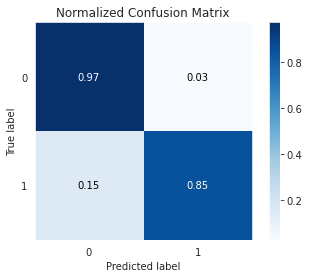

In [ ]:
# plotando a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimindo relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
knn=KNeighborsClassifier(n_neighbors=3)

# imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimindo a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

## **Tuning do Modelo**

> O *tuning* nos ajuda a melhorar os hiperparâmetros dos algoritmos a fim de otimizar seus resultados.

> Sendo os resultados muito próximos, escolhemos o algoritmo de `Floresta Aleatória` para tentar melhorar.

> Para saber mais, clique [aqui](https://bit.ly/30mKZ1q).

**Criando listas com possíveis valores**

In [ ]:
# valores de estimators ou quantidade de árvores da floresta
valores_estimators = [10, 20, 50, 100, 150]

# valores para o critério de divisão
valores_criterion = ['gini','entropy']

# valores para a profundidade máxima de cada árvore
valores_max_depth = [10, 20, 50, 100]

# valores para os parametros min_samples_split 
valores_min_samples_split = [2, 5, 10,15]

# valores para os parametros min_samples_leaf
valores_min_samples_leaf = [1, 5, 10,15]

**Criando dicionário com as listas**

In [ ]:
parametros_grid = dict(n_estimators=valores_estimators,
                       criterion=valores_criterion,
                       max_depth=valores_max_depth,
                       min_samples_split=valores_min_samples_split,
                       min_samples_leaf=valores_min_samples_leaf 
                      )

**Visualizando o dicionário**

In [ ]:
parametros_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 50, 100],
 'min_samples_leaf': [1, 5, 10, 15],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [10, 20, 50, 100, 150]}

**Instanciando um classificador e o GridSearchCV**

> O `GridSearchCV` é quem fará de fato o tuning.

In [ ]:
rf = RandomForestClassifier()
grid = GridSearchCV(rf, parametros_grid, cv=10, scoring='accuracy')

**Passando os dados para grid**

In [ ]:
grid.fit(X_rus, y_rus)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

**Visualizando os resultados**

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.02536619, 0.04280159, 0.10568306, 0.20852442, 0.31389925,
        0.02143128, 0.04134378, 0.10280704, 0.21256077, 0.30518398,
        0.0212625 , 0.04180782, 0.10156469, 0.20604894, 0.30425606,
        0.02044692, 0.0405647 , 0.10108895, 0.20217116, 0.30380335,
        0.01982727, 0.03932586, 0.09792225, 0.19529138, 0.29151299,
        0.02174907, 0.04143047, 0.09996791, 0.19307344, 0.28840313,
        0.01964729, 0.0387347 , 0.09701853, 0.19437003, 0.29343953,
        0.01929657, 0.03875227, 0.09532607, 0.19425032, 0.2852906 ,
        0.01924865, 0.03616016, 0.09213798, 0.18475709, 0.27572734,
        0.02030835, 0.03666124, 0.09337499, 0.1845829 , 0.27778611,
        0.01842091, 0.03636742, 0.09045565, 0.18102281, 0.27461944,
        0.01861088, 0.03706915, 0.09158871, 0.18234084, 0.2750766 ,
        0.01804228, 0.03476379, 0.08775418, 0.17759936, 0.26239059,
        0.01811697, 0.03482368, 0.08668232, 0.17534091, 0.26442153,
        0.01868322, 0.03710933,

**Visualizando os melhores parâmetros**

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

**Visualizando o score para o melhor parâmetro**
> O valor está abaixo do encontrado com os valores originais de hiperparâmetros. Isso se dá porque passamos uma lista para combinação e, curiosamente neste caso, após todas as combinações com todas as possibilidades passadas, os valores originais eram melhores.

In [ ]:
grid.best_score_

0.9607182524990746

## **Conclusão**

Conseguimos criar um bom modelo aqui, porém para o mundo real alguns pontos devem ser apontados:

- Os dados estão em uma qualidade que não encontramos no ambiente real.
- Mesmo que o valor seja tão bom, no dia-a-dia, testes como o teste A/B devem conduzir a implementação.
- Melhoria continua deve fazer parte do trabalho. Não é apenas porque está bom que devemos parar por aqui. Retreinar o modelo e procurar novas soluções em novas tecnologias é uma boa opção.

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).


[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)



<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>